<a href="https://colab.research.google.com/github/BHUMIKAA-B/ai/blob/main/_AIML_Task1%2C%202%20and%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#TASK1**

In [17]:
import pandas as pd
file_name = "/content/Titanic-Dataset.csv"
df = pd.read_csv(file_name)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [18]:
print(df.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [19]:
import pandas as pd
df_cleaned = df.copy()
columns_to_drop = ['Cabin', 'PassengerId', 'Name', 'Ticket']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

In [20]:
median_age = df_cleaned['Age'].median()
df_cleaned['Age'].fillna(median_age, inplace=True)

/tmp/ipython-input-3388924918.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Age'].fillna(median_age, inplace=True)


In [21]:
mode_embarked = df_cleaned['Embarked'].mode()[0]
df_cleaned['Embarked'].fillna(mode_embarked, inplace=True)

/tmp/ipython-input-864851345.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Embarked'].fillna(mode_embarked, inplace=True)


In [22]:
print("Missing Value Check")
print(df_cleaned.isnull().sum())

Missing Value Check
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [23]:
df_cleaned['Sex'] = df_cleaned['Sex'].map({'male': 0, 'female': 1})

In [24]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Embarked'], drop_first=True, prefix='Embarked')

In [25]:
print("Prepared Data Head")
print(df_cleaned)

Prepared Data Head
     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  \
0           0       3    0  22.0      1      0   7.2500       False   
1           1       1    1  38.0      1      0  71.2833       False   
2           1       3    1  26.0      0      0   7.9250       False   
3           1       1    1  35.0      1      0  53.1000       False   
4           0       3    0  35.0      0      0   8.0500       False   
..        ...     ...  ...   ...    ...    ...      ...         ...   
886         0       2    0  27.0      0      0  13.0000       False   
887         1       1    1  19.0      0      0  30.0000       False   
888         0       3    1  28.0      1      2  23.4500       False   
889         1       1    0  26.0      0      0  30.0000       False   
890         0       3    0  32.0      0      0   7.7500        True   

     Embarked_S  
0          True  
1         False  
2          True  
3          True  
4          True  
..          ...  
88

In [26]:
print(df_cleaned.head(5))

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True


In [27]:
print("Final Data Types")
df_cleaned.info()

Final Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
X = df_cleaned.drop('Survived', axis=1)
y = df_cleaned['Survived']

In [30]:
scaler = StandardScaler()
X_scaled = X.copy()

In [31]:
numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [32]:
X_scaled[numerical_cols] = scaler.fit_transform(X_scaled[numerical_cols])

In [33]:
print("Scaled Features Head")
print(X_scaled)

Scaled Features Head
       Pclass  Sex       Age     SibSp     Parch      Fare  Embarked_Q  \
0    0.827377    0 -0.565736  0.432793 -0.473674 -0.502445       False   
1   -1.566107    1  0.663861  0.432793 -0.473674  0.786845       False   
2    0.827377    1 -0.258337 -0.474545 -0.473674 -0.488854       False   
3   -1.566107    1  0.433312  0.432793 -0.473674  0.420730       False   
4    0.827377    0  0.433312 -0.474545 -0.473674 -0.486337       False   
..        ...  ...       ...       ...       ...       ...         ...   
886 -0.369365    0 -0.181487 -0.474545 -0.473674 -0.386671       False   
887 -1.566107    1 -0.796286 -0.474545 -0.473674 -0.044381       False   
888  0.827377    1 -0.104637  0.432793  2.008933 -0.176263       False   
889 -1.566107    0 -0.258337 -0.474545 -0.473674 -0.044381       False   
890  0.827377    0  0.202762 -0.474545 -0.473674 -0.492378        True   

     Embarked_S  
0          True  
1         False  
2          True  
3          True  


In [34]:
print(X_scaled.head(5))

     Pclass  Sex       Age     SibSp     Parch      Fare  Embarked_Q  \
0  0.827377    0 -0.565736  0.432793 -0.473674 -0.502445       False   
1 -1.566107    1  0.663861  0.432793 -0.473674  0.786845       False   
2  0.827377    1 -0.258337 -0.474545 -0.473674 -0.488854       False   
3 -1.566107    1  0.433312  0.432793 -0.473674  0.420730       False   
4  0.827377    0  0.433312 -0.474545 -0.473674 -0.486337       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


Boxplots for outlier visualization


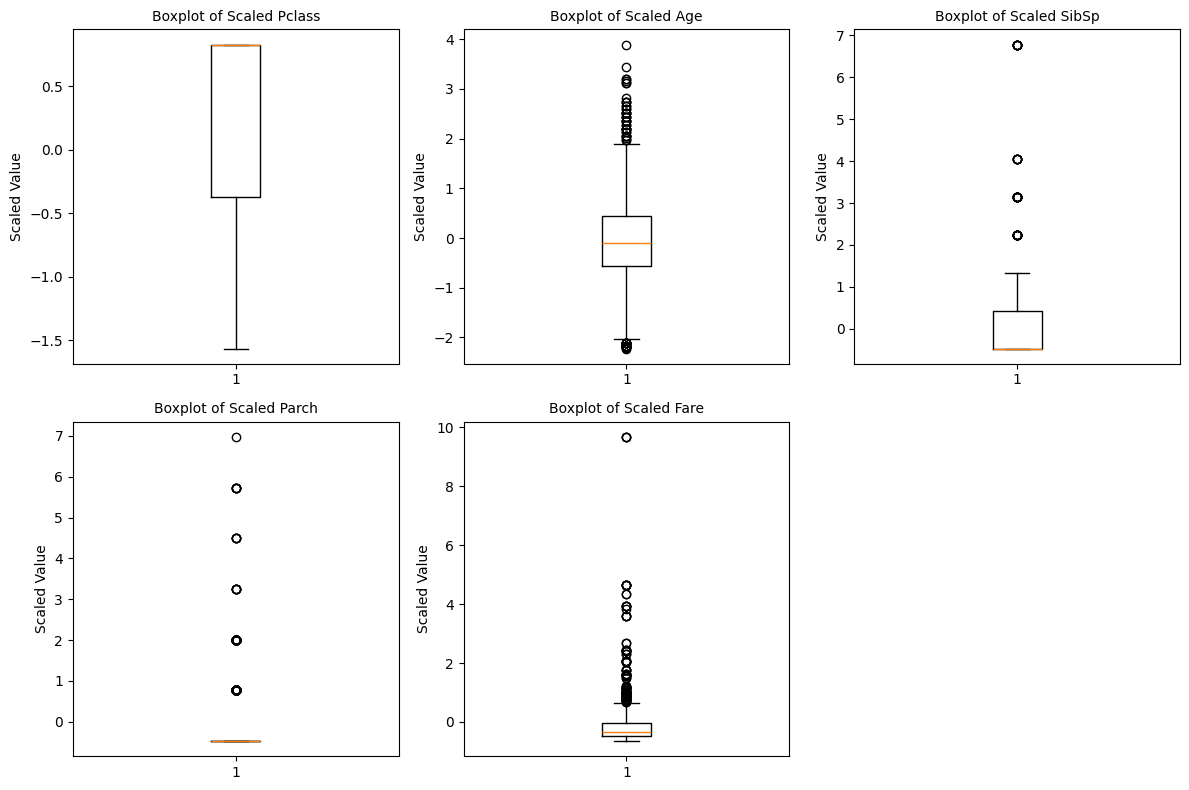

In [35]:
import matplotlib.pyplot as plt
print("Boxplots for outlier visualization")
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(X_scaled[col])
    plt.title(f'Boxplot of Scaled {col}', fontsize=10)
    plt.ylabel('Scaled Value')
plt.tight_layout()
plt.savefig("outlier_boxplots.png")
plt.show()

In [36]:
def remove_outliers_iqr(df, target, columns):
    df_out = df.copy()
    df_out['Survived'] = target.values
    initial_count = len(df_out)
    for col in columns:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
    removed_count = initial_count - len(df_out)
    print(f"Total rows removed due to outliers: {removed_count} (New total: {len(df_out)})")
    X_final = df_out.drop('Survived', axis=1)
    y_final = df_out['Survived']
    return X_final, y_final

In [37]:
X_final, y_final = remove_outliers_iqr(X_scaled, y, numerical_cols)

Total rows removed due to outliers: 330 (New total: 561)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [39]:
print("Data Splitting")
print(f"Total Final Dataset Size: {X_final.shape[0]}")
print(f"Training Features (X_train) size: {X_train.shape}")
print(f"Testing Features (X_test) size: {X_test.shape}")

Data Splitting
Total Final Dataset Size: 561
Training Features (X_train) size: (448, 8)
Testing Features (X_test) size: (113, 8)


**#TASK2**

In [40]:
print("Summary Statistics")
print(df.describe())

Summary Statistics
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


<Figure size 1200x800 with 0 Axes>

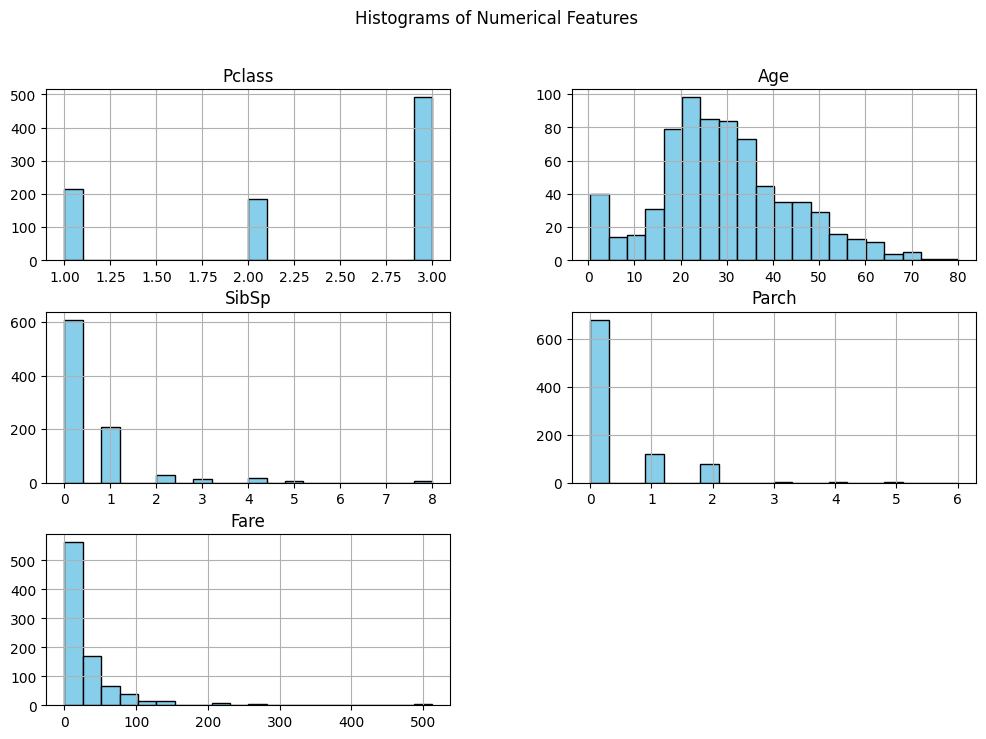

In [41]:
plt.figure(figsize=(12,8))
df[numerical_cols].hist(bins=20, figsize=(12,8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

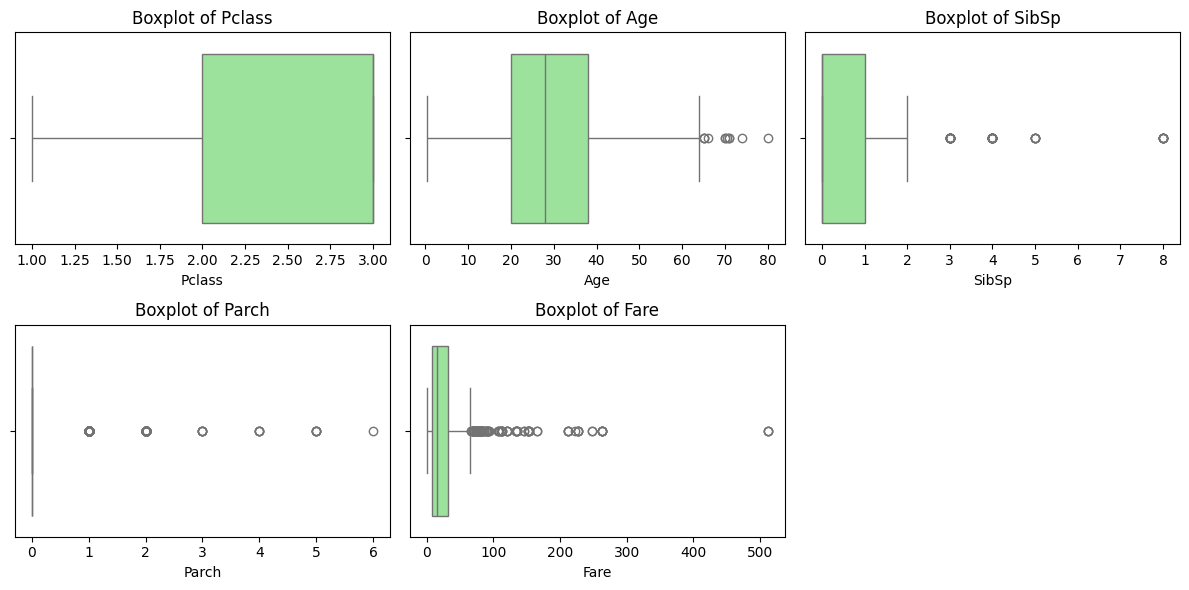

In [42]:
import seaborn as sns
plt.figure(figsize=(12,6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

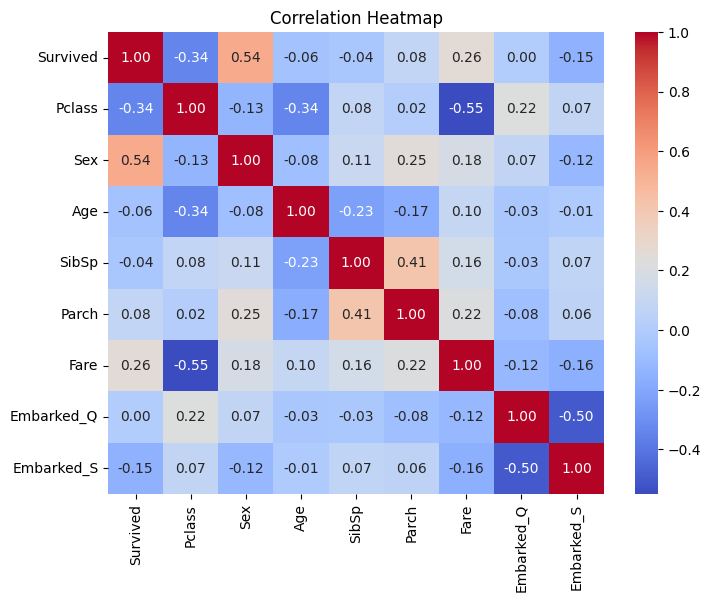

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

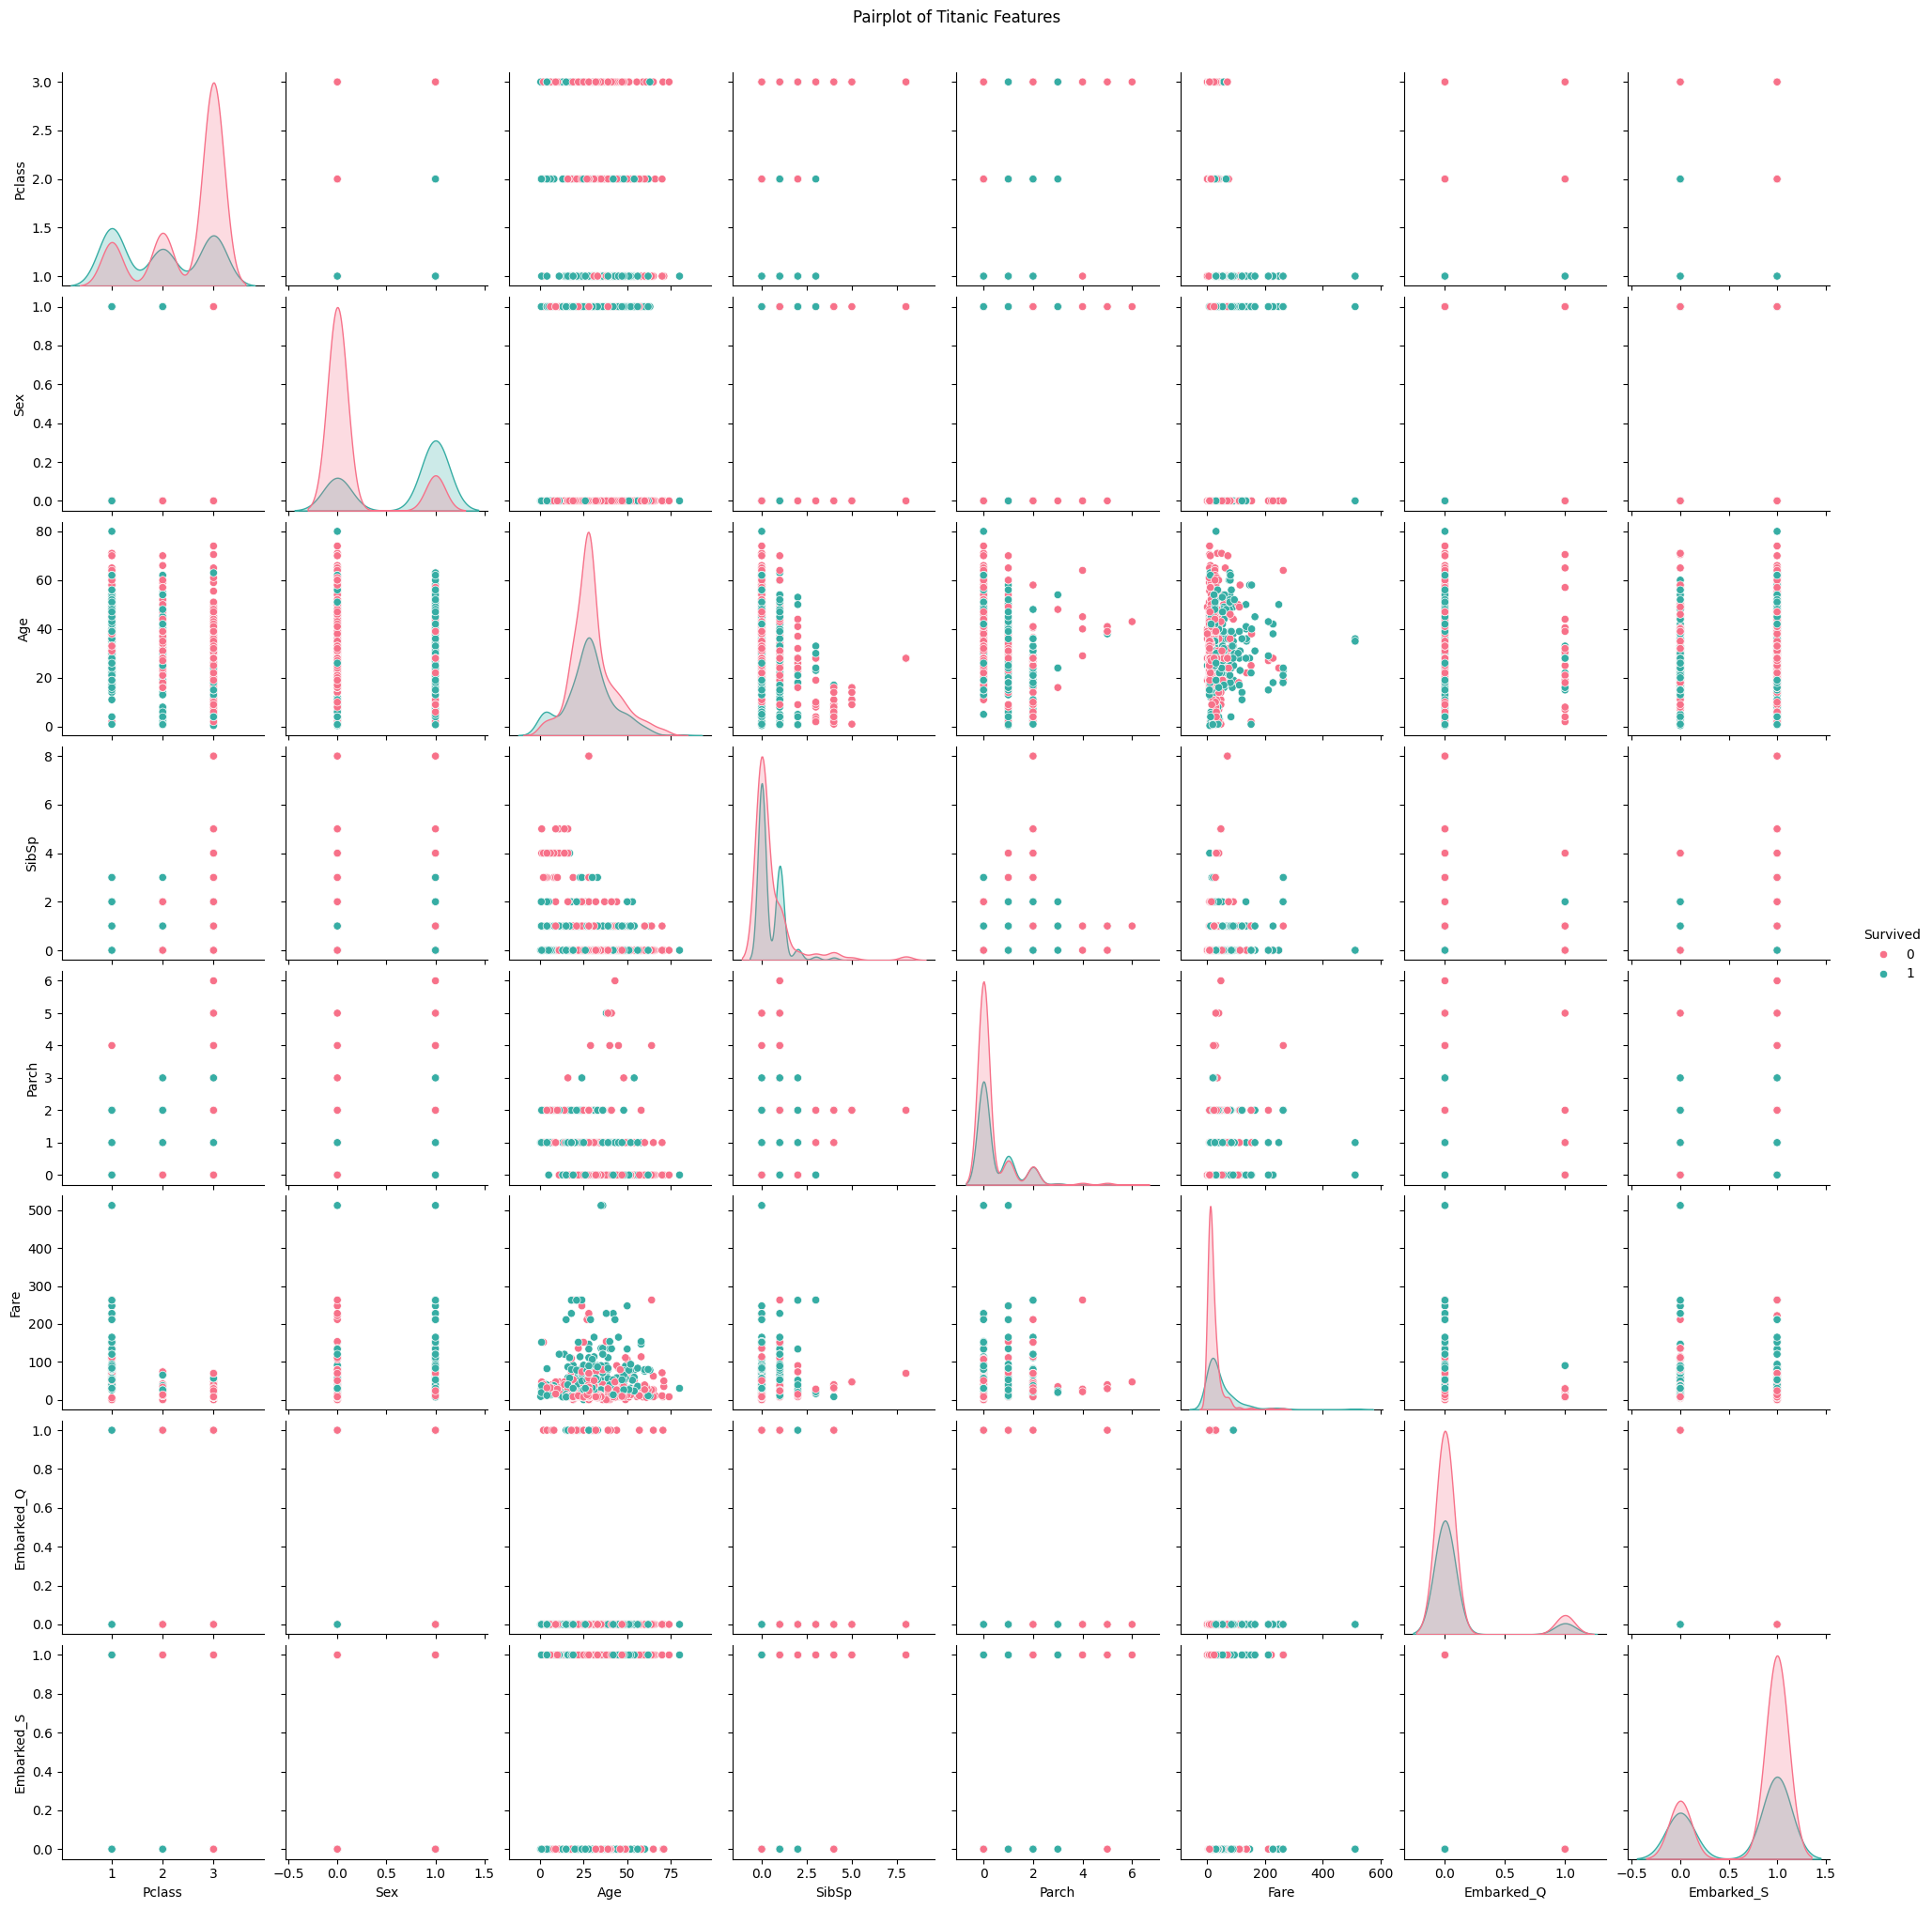

In [44]:
sns.pairplot(df_cleaned, hue='Survived', diag_kind='kde', palette='husl')
plt.suptitle("Pairplot of Titanic Features", y=1.02)
plt.show()

/tmp/ipython-input-689803033.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


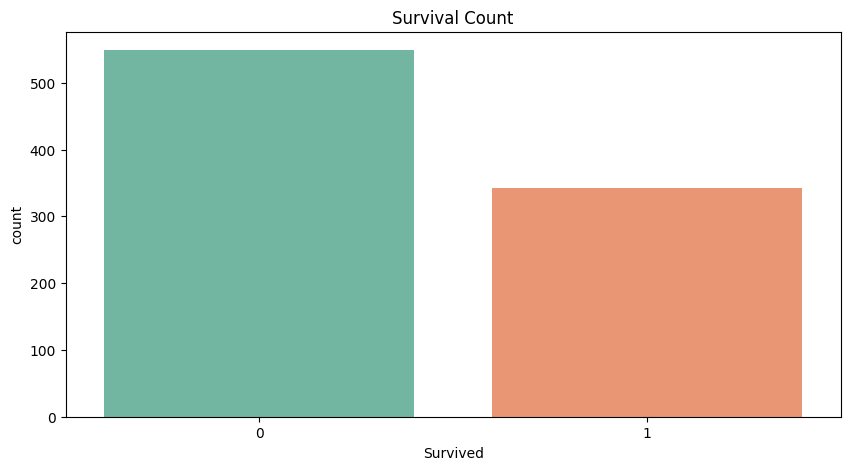

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title("Survival Count")
plt.show()

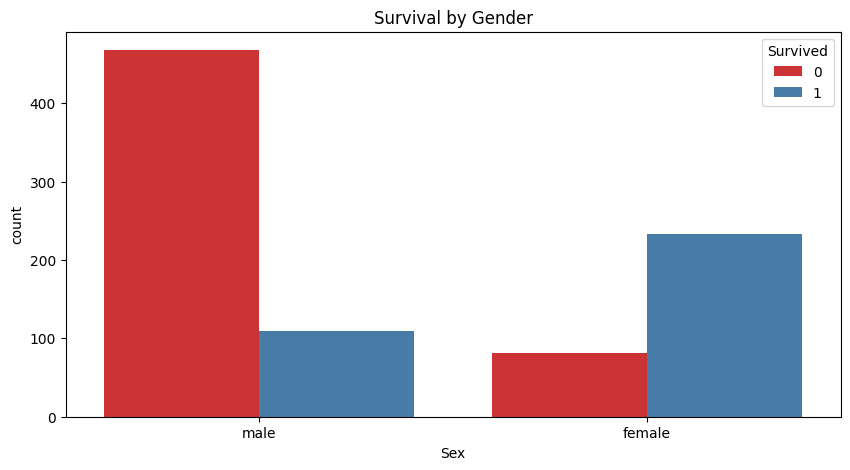

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')
plt.title("Survival by Gender")
plt.show()

/tmp/ipython-input-403827513.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')


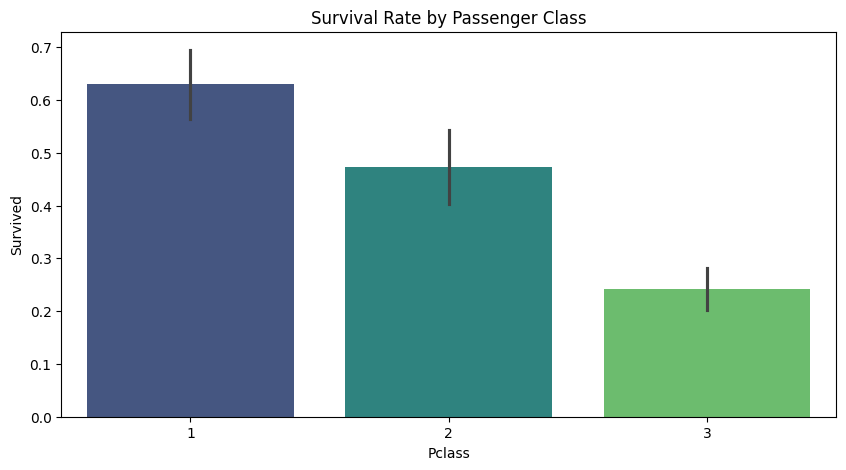

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')
plt.title("Survival Rate by Passenger Class")
plt.show()

In [48]:
print("Skewness of Numerical Columns")
print(df[numerical_cols].skew())

Skewness of Numerical Columns
Pclass   -0.630548
Age       0.389108
SibSp     3.695352
Parch     2.749117
Fare      4.787317
dtype: float64


**#Task 3**

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 0.2666286560007759
Mean Squared Error: 0.13968655423505688
R² Score: 0.3359428104886667


In [52]:
coefficients = pd.DataFrame(model.coef_, X_final.columns, columns=['Coefficient'])
print("\n--- Feature Coefficients ---")
print(coefficients)
print(f"\nIntercept: {model.intercept_:.4f}")


--- Feature Coefficients ---
             Coefficient
Pclass     -1.237302e-01
Sex         5.445473e-01
Age        -1.012671e-02
SibSp      -5.781170e-02
Parch       8.326673e-17
Fare        5.054655e-02
Embarked_Q  1.755526e-02
Embarked_S -1.020557e-01

Intercept: 0.2574


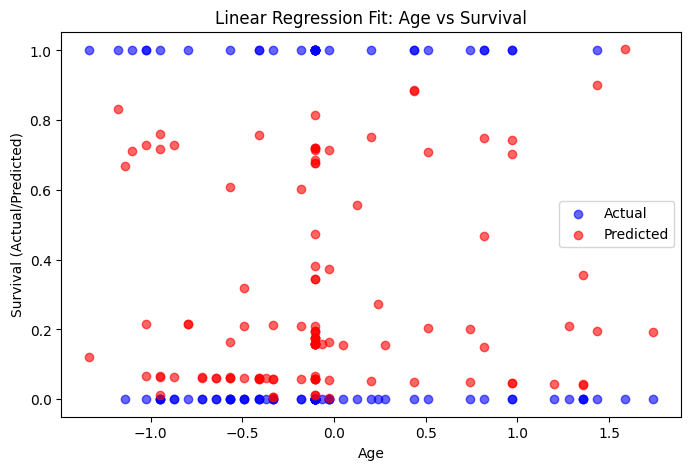

In [53]:
plt.figure(figsize=(8,5))
plt.scatter(X_test['Age'], y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test['Age'], y_pred, color='red', label='Predicted', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Survival (Actual/Predicted)')
plt.title('Linear Regression Fit: Age vs Survival')
plt.legend()
plt.show()

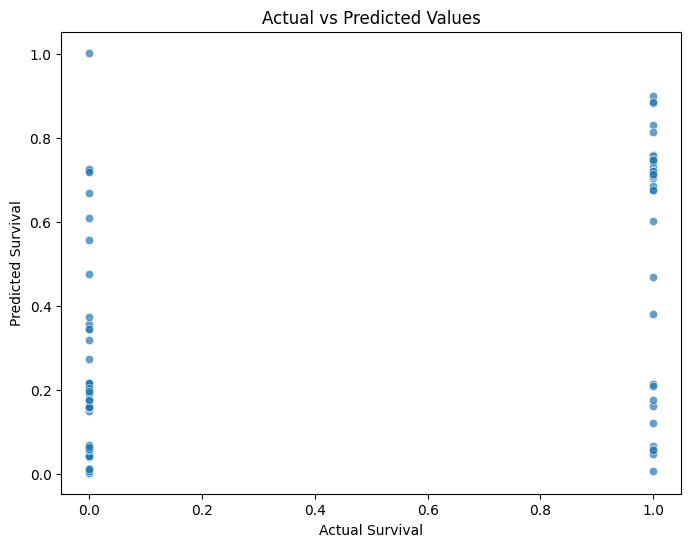

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel('Actual Survival')
plt.ylabel('Predicted Survival')
plt.title('Actual vs Predicted Values')
plt.show()

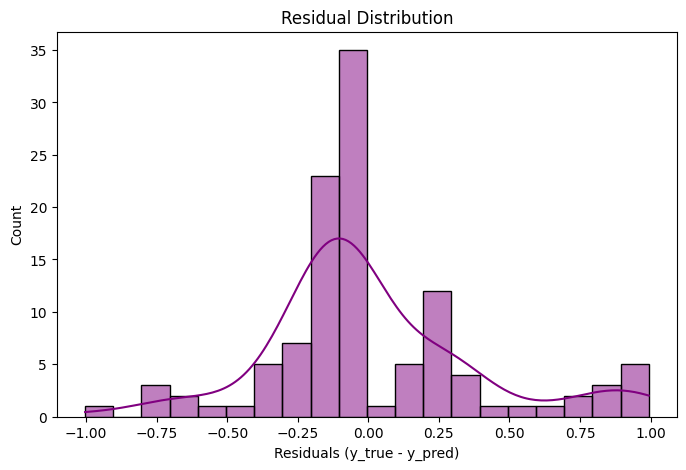

In [55]:
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=20, kde=True, color='purple')
plt.title("Residual Distribution")
plt.xlabel("Residuals (y_true - y_pred)")
plt.show()